In [3]:
import pandas as pd
import numpy as np

def calculate_topsis(data, weights, impacts):
    df = data.copy()
    columns = df.columns[1:]

    for col in columns:
        norm_factor = np.sqrt(np.sum(df[col]**2))
        df[col] = df[col] / norm_factor

    for i, col in enumerate(columns):
        df[col] = df[col] * weights[i]

    #Identify Ideal Best (V+) and Ideal Worst (V-)
    v_plus = []
    v_minus = []

    for i, col in enumerate(columns):
        if impacts[i] == '+':
            v_plus.append(df[col].max())
            v_minus.append(df[col].min())
        else:
            v_plus.append(df[col].min())
            v_minus.append(df[col].max())

    #Calculate Separation Measures (Euclidean Distance)
    s_plus = np.sqrt(np.sum((df[columns].values - v_plus)**2, axis=1))
    s_minus = np.sqrt(np.sum((df[columns].values - v_minus)**2, axis=1))

    #Calculate TOPSIS Score and Rank
    df['Topsis Score'] = s_minus / (s_plus + s_minus)
    df['Rank'] = df['Topsis Score'].rank(ascending=False).astype(int)

    return df.sort_values(by='Rank')

# Dataset
data_dict = {
    'Model': ['BERT-base', 'RoBERTa-base', 'DistilBERT', 'XLNet-base', 'MobileBERT'],
    'Accuracy': [0.92, 0.94, 0.89, 0.93, 0.88],
    'F1-Score': [0.91, 0.93, 0.88, 0.92, 0.87],
    'Size': [440, 490, 260, 470, 128],
    'Inference': [45, 50, 15, 70, 8]
}

df_models = pd.DataFrame(data_dict)

# Weights: Giving slightly more importance to Accuracy and Inference Speed
weights = [0.35, 0.25, 0.15, 0.25]

impacts = ['+', '+', '-', '-']

results = calculate_topsis(df_models, weights, impacts)

print("--- Final Model Rankings ---")
print(results[['Model', 'Topsis Score', 'Rank']])

--- Final Model Rankings ---
          Model  Topsis Score  Rank
4    MobileBERT      0.930298     1
2    DistilBERT      0.824273     2
0     BERT-base      0.372889     3
1  RoBERTa-base      0.296870     4
3    XLNet-base      0.062122     5


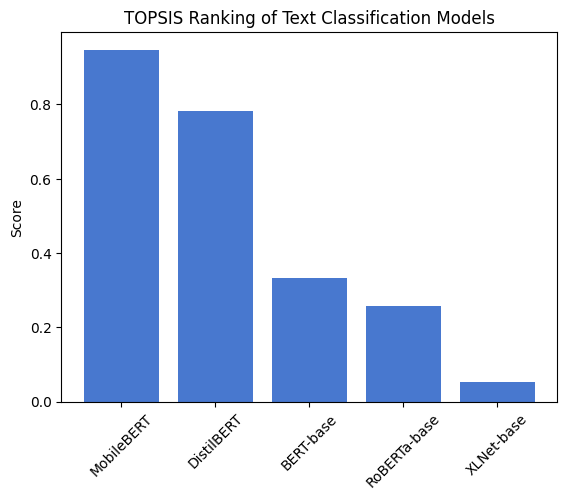

In [11]:
import matplotlib.pyplot as plt

models = df['Model']
scores = df['Topsis Score']

plt.bar(models,scores)
plt.title("TOPSIS Ranking of Text Classification Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()
